#**CSR GRACE/GRACE-FO Mascon Data Visualization Tool**

Use the toolbars to zoom, change the color scale, choose date, etc.

In [6]:
%%capture

'''
Copyright (c) 2023 Aanchal Save

Available for personal and professional use and distribution with or without modification

'''

%matplotlib widget
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ipywidgets as widgets
import datetime
import warnings
import requests
#from google.colab import output
#output.enable_custom_widget_manager()

warnings.filterwarnings('ignore')

print('downloading data...')
url = "http://download.csr.utexas.edu/outgoing/grace/RL06_mascons/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc#mode=bytes"
r = requests.get(url, allow_redirects=True).content
data = Dataset("name", memory=r)

lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
lwe = data.variables['lwe_thickness'][:]

timeDays = []

print('done!')

creating maps...


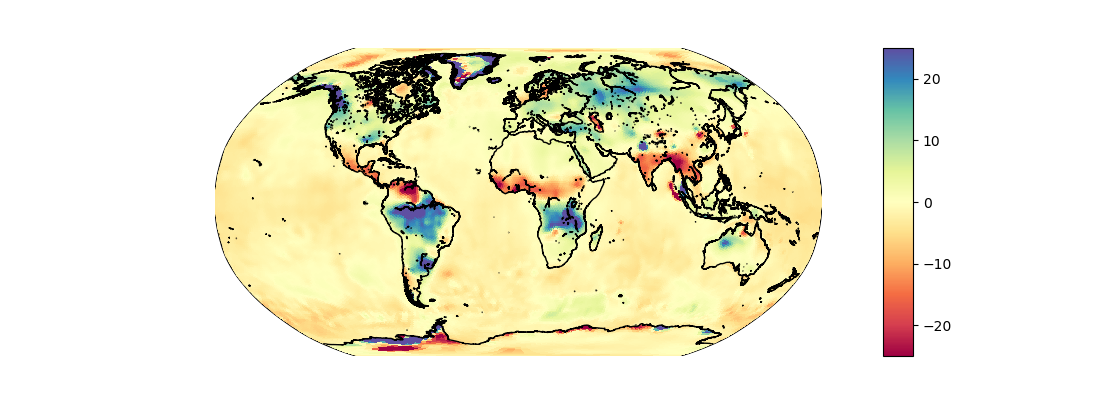

interactive(children=(Dropdown(description='Choose a month ', options=('2002-04-18', '2002-05-10', '2002-08-16…

In [3]:
#@title **Produce Maps (Click run to reset map) [Press play below]**

'''
Copyright (c) 2023 Aanchal Save

Available for personal and professional use and distribution with or without modification

'''
fig = plt.figure(figsize = (11, 4))
for i in time:
    timeDays.append((datetime.datetime(2002,1,1,0,0) + datetime.timedelta(days = int(i))).strftime("%Y-%m-%d"))

# map lon values to -180..180 range
f = lambda x: ((x+180) % 360) - 180
tmprt_lon = f(lons)
# rearange data
ind = np.argsort(tmprt_lon)
lons = tmprt_lon[ind]
lwe = lwe[:, :, ind]

mp = Basemap(projection = 'robin', resolution = 'i', lon_0 = 0, lat_0 = 0)

lon, lat = np.meshgrid(lons, lats)

x, y = mp(lon, lat)

style = {'description_width': 'initial'}

time_case = widgets.Dropdown(
    options = timeDays,
    value = timeDays[0],
    description = 'Choose a month ',
    disabled = False,
    style = style
)

color_bounds = widgets.Dropdown(
    options = [15, 20, 25, 30, 50, 100],
    value = 20,
    description = 'Choose desired color scale ',
    disabled = False,
    style = style
)

color_map = widgets.Dropdown(
    options = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'],
    value = 'Spectral',
    description = 'Choose a color map ',
    disabled = False,
    style = style
)

mp.drawcoastlines()

c_scheme = mp.pcolormesh(x, y, np.squeeze(lwe[0,:,:]), cmap = 'Spectral', vmin = -25, vmax = 25)
cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
    
def makeMap(timeVal, boundsVal, cmapVal):
    monthNum = timeDays.index(timeVal)
    c_scheme = mp.pcolormesh(x, y, np.squeeze(lwe[monthNum,:,:]), cmap = cmapVal, vmin = -boundsVal, vmax = boundsVal)
    global cbar
    cbar.remove()
    cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
    hasColorBar = True
    plt.title(f'Total Water Storage ({timeDays[monthNum]})')

fig.canvas.header_visible = False
fig.canvas.footer_visible = False

plt.show()

widgets.interactive(makeMap, timeVal=time_case, boundsVal = color_bounds, cmapVal = color_map)

# **Acknowledgements:**

GRACE/GRACE-FO Data downloaded from: http://www2.csr.utexas.edu/grace

Contact the author:

https://aanchalsave.com

saveaanchal@gmail.com

https://github.com/SaveAanchal